<a href="https://colab.research.google.com/github/LeonardoClemente23/quarentenadados-Alura/blob/main/Aula_04_desafios_QuarentenaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados_enem = pd.read_csv(uri)
dados_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [ ]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados_enem[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [ ]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [ ]:
values = {'NU_NOTA_CN' : 0, 'NU_NOTA_CH' : 0, 'NU_NOTA_LC' : 0,'NU_NOTA_MT' : 0, 'NU_NOTA_REDACAO': 0}
dados_enem_preenchido = dados_enem.fillna(value=values)
dados_enem_preenchido[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


Eu preferir substituir por zero, porque se a pessoa não apareceu para fazer a prova, não tem porque agregar um valor à prova que ela não fez. caso for necessário algum tipo de inferência, tem como pegar apenas os que tiveram presença marcada, mesmo se zerou um dia de provas ou todas

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

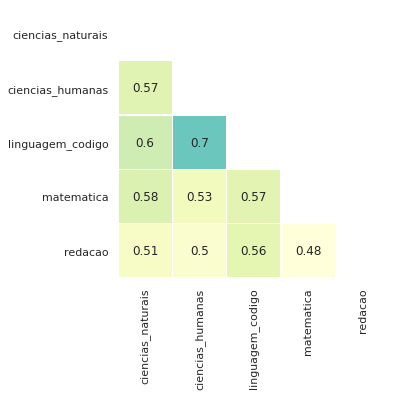

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, annot=True, linewidths=.2, cmap="YlGnBu",
    cbar=False)


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [ ]:
def conta_acerto_serie(respostas, gabarito):
  """
  -> Devolve uma serie com o total de acertos por pessoa na prova do ENEM 2018  
  """
  acertos = []
  
  for lista in range(len(respostas)):
    cont = 0
    
    for ind, letra in enumerate(respostas[lista]):
      if letra == gabarito[lista][ind]:
        cont+=1
    
    acertos.append(cont)

  return pd.Series(data=acertos)


In [ ]:
# Função melhor elaborada para o mesmo propósito

def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [ ]:
respostas_cn = dados_enem['TX_RESPOSTAS_CN'].dropna().to_list()
gabarito_cn = dados_enem['TX_GABARITO_CN'].dropna().to_list()
respostas_ch = dados_enem['TX_RESPOSTAS_CH'].dropna().to_list()
gabarito_ch = dados_enem['TX_GABARITO_CH'].dropna().to_list()
respostas_lc = dados_enem['TX_RESPOSTAS_LC'].dropna().to_list()
gabarito_lc = dados_enem['TX_GABARITO_LC'].dropna().to_list()
respostas_mt = dados_enem['TX_RESPOSTAS_MT'].dropna().to_list()
gabarito_mt = dados_enem['TX_GABARITO_MT'].dropna().to_list()

df_acerto = pd.DataFrame()

In [ ]:
df_acerto['acertos_ciencias_da_natureza'] = conta_acerto_serie(respostas_cn, gabarito_cn)
df_acerto['acertos_ciencias_humanas'] = conta_acerto_serie(respostas_ch, gabarito_ch)
df_acerto['acertos_lingagens_e_codigos'] = conta_acerto_serie(respostas_lc, gabarito_lc)
df_acerto['acertos_matematica'] = conta_acerto_serie(respostas_mt, gabarito_mt)

df_acerto

,acertos_ciencias_da_natureza,acertos_ciencias_humanas,acertos_lingagens_e_codigos,acertos_matematica
0,11,27,33,22
1,8,9,8,6
2,7,10,11,10
3,11,9,15,8
4,8,12,15,13
...,...,...,...,...
97532,12,25,22,12
97533,6,12,16,11
97534,14,32,31,9
97535,7,22,24,13


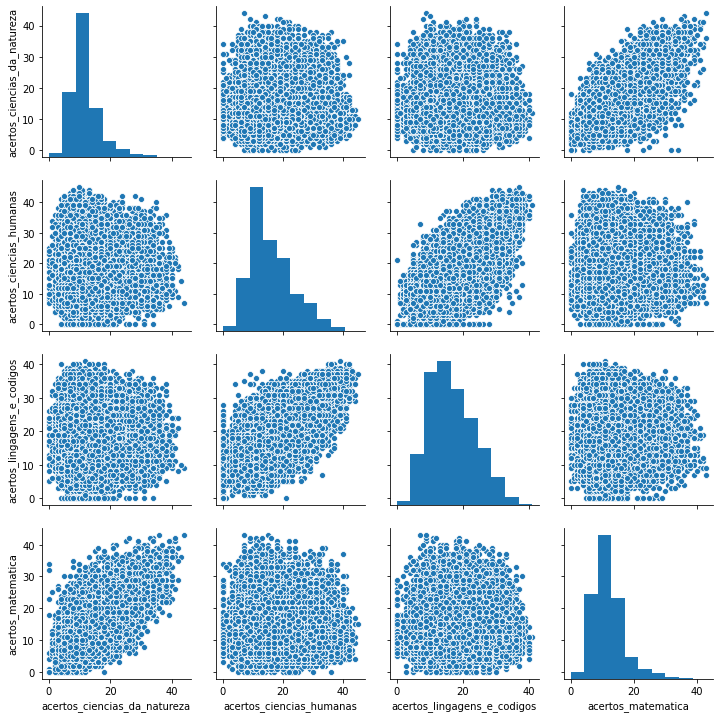

In [ ]:
sns.pairplot(df_acerto)

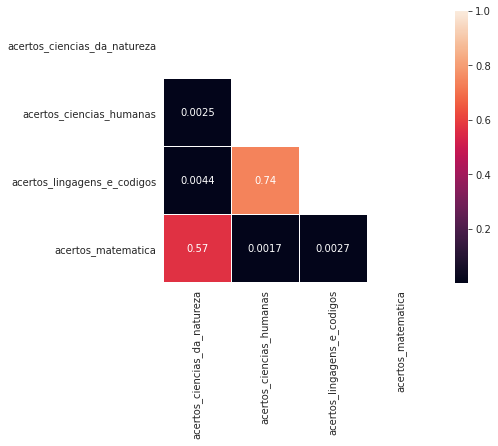

In [ ]:
corr_acertos = df_acerto.corr()

mask = np.zeros_like(corr_acertos)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_acertos, mask=mask, vmax=1, square=True, annot=True, linewidths=.2)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [ ]:
['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_enem_sem_zeros = dados_enem_preenchido.query("NU_NOTA_CN > 0 & NU_NOTA_CH > 0 & NU_NOTA_LC > 0 &NU_NOTA_MT > 0 &NU_NOTA_REDACAO > 0")
dados_enem_sem_zeros[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [ ]:
# todos códigos que representam reaplicação de prova estam vazias, logo não 
# seráo levas em consideração
for k in range(16):
  print(dados_enem.query(f"CO_PROVA_MT == {487+k}")['TX_GABARITO_MT'])


Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)
Series([], Name: TX_GABARITO_MT, dtype: object)


In [ ]:
def acerto_questao_serie(codigo_prova, materia):
  """
  -> Devolve uma serie com quantidade de acertos por questão na prova do 
  ENEM 2018  
  """
  gabarito = dados_enem.query(f"CO_PROVA_{materia} == {codigo_prova}")[f'TX_GABARITO_{materia}'].dropna().head(1).to_list()
  resposta = dados_enem.query(f"CO_PROVA_{materia} == {codigo_prova}")[f'TX_RESPOSTAS_{materia}'].dropna().to_list()
  acerto_por_questao = []

  for questao in range(len(gabarito[0])):
    cont = 0
    
    for resp in range(len(resposta)):
      if gabarito[0][questao] == resposta[resp][questao]:
        cont += 1
    
    acerto_por_questao.append(cont)
  
  return pd.Series(acerto_por_questao)


In [ ]:
# Montagem do Data frame acertos por questão por prova
materias = ['CN','CH','MT']
codigos = [[447,448,449,450],[451,452,453,454],[459,460,461,462]]
acertos_por_questao = pd.DataFrame()
questoes = pd.Series(list(range(1,46)))
acertos_por_questao['Questao'] = questoes
for ind, materia in enumerate(materias):
  for codigo in codigos[ind]:
    acertos_por_questao[f'{codigo}_{materia}'] = acerto_questao_serie(codigo, materia)


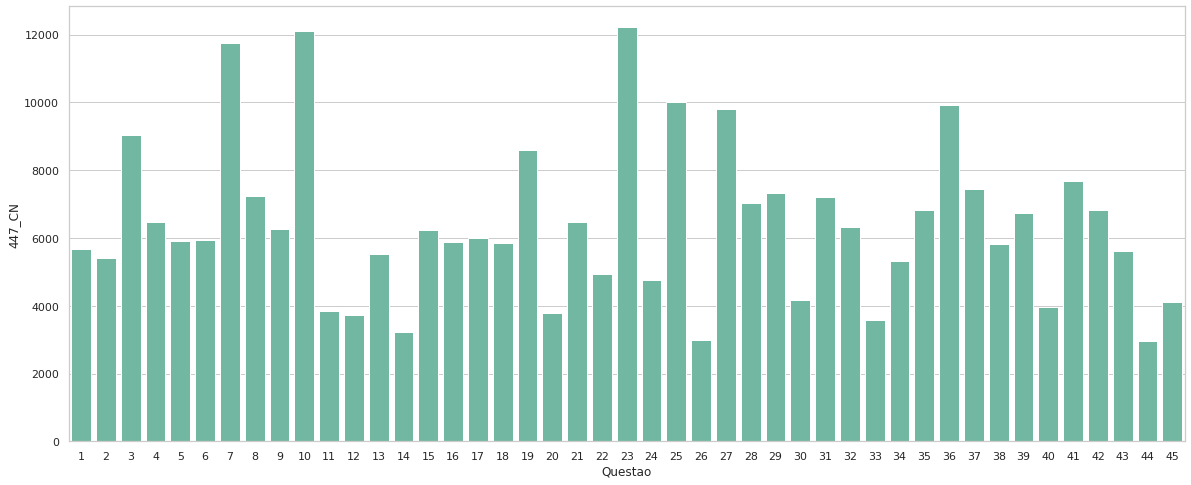

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
sns.barplot(x='Questao', y='447_CN', data=acertos_por_questao,
            palette=sns.color_palette("BuGn_r", n_colors=1))
plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.